# Data Analysis SALES-Python (Real-Case-Study)

## Import all libraries

In [2]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from itertools import combinations
from collections import Counter

## Merge 12 months of sales data into one CSV file

In [3]:
path = r'.\Sales_Data'
output_path = r'.\Output\merged_CSV.csv'

#Collect data from all .cvs
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]

#create a empyty Dataframe to collect the names of all CSV files
dfs = []

## Create an empty list to collect the DataFrames of each CSV file
for file in csv_files:
    file_path = os.path.join(path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)
#concatenate All data into a DataFrame
All_Data = pd.concat(dfs, ignore_index=True)
#Output   
All_Data.to_csv(output_path, index=False)
print(f"Merged CSV files saved to {output_path}")


Merged CSV files saved to .\Output\merged_CSV.csv


## Drop rows of NAN 

In [4]:
#Remove all inconsistence
nan_df =  All_Data[All_Data.isna().any(axis=1)]
All_Data = All_Data.dropna(how = 'all')

## Find 'Or' and delete it

In [5]:
#Remove more inconcistence
All_Data = All_Data[All_Data['Order Date'].str[0:2] != 'Or']

## Create two columns 'Month','City' to better control data and get results

In [6]:
#Create a column called "month" by taking the first two characters of the Order date after converting it to an integer.  
All_Data['Month'] = All_Data['Order Date'].str[0:2].astype('int32')
#Create new columns to state and city using apply and split function
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
All_Data['City'] =All_Data['Purchase Address'].apply(lambda x: f"{get_city(x) } ({get_state(x)})")

## Save cleaned and merged data as excel file: Year_Data.xlsx

In [7]:
output_path = r'.\Output\Year_Data.xlsx'
All_Data.to_excel(output_path, index="False")

## Graph showing the highest month of sales and this corresponding profit:

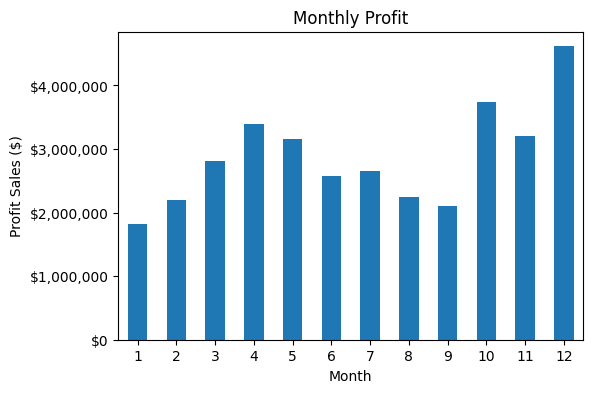

The month with the highest sales is Month 12.
The profit for that month is USD $4613443.34.


In [8]:
#Define columns as float
All_Data['Price Each'] = All_Data['Price Each'].astype(float)
All_Data['Quantity Ordered'] = All_Data['Quantity Ordered'].astype(float)
#Create profit column
All_Data['Profit'] = All_Data['Price Each'] * All_Data['Quantity Ordered']
#Colect all Sales month and all profit
monthly_sales = All_Data.groupby('Month')['Quantity Ordered'].sum()
monthly_profit = All_Data.groupby('Month')['Profit'].sum()
#Defining maximum sales month
max_sales_month = monthly_sales.idxmax()
#Defining maximum month profit
max_profit = monthly_profit[max_sales_month]
#plt_graphic
plt.figure(figsize=(6, 4))
monthly_profit.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Profit Sales ($)')
plt.title('Monthly Profit')
plt.xticks(rotation=0)

# Format y-axis labels
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()
#Showing the result 
print(f"The month with the highest sales is Month {max_sales_month}.")
print(f"The profit for that month is USD ${max_profit:.2f}.")

## Graph showing the biggest sales location:

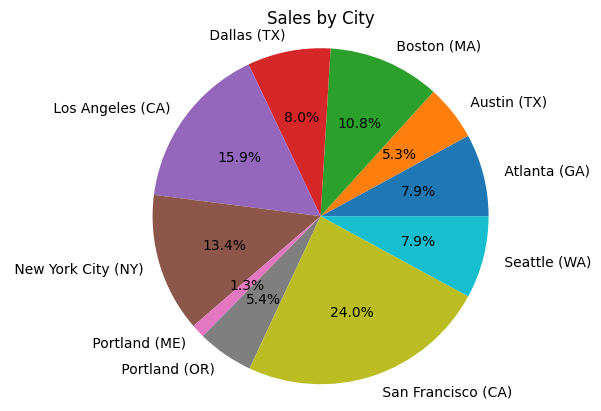

 San Francisco (CA)  with  50239.0  sales.


In [9]:
cities = [city for city, df in All_Data.groupby('City')]  # Get unique cities from the DataFrame

result1 = All_Data.groupby('City')['Quantity Ordered'].sum()  # Calculate the sum of 'Quantity Ordered' by city

result = result1.idxmax()  # Get the city with the highest sum of 'Quantity Ordered'
max_sales = result1.max()  # Get the highest sum of 'Quantity Ordered'

plt.pie(result1, labels=cities, autopct='%1.1f%%')  # Create a pie chart of sales by city
plt.axis('equal')  # Set the pie chart to have an equal aspect ratio
plt.title('Sales by City')  # Set the title of the pie chart
plt.show()  # Display the pie chart

print(result, ' with ', max_sales, ' sales.')  # Print the city with the highest sales and the corresponding sales value




## What time shold we display advertisements to maximize likelihood of customer's buying product?

#### Convert order date to time format

In [10]:
All_Data['Order Date'] = pd.to_datetime(All_Data['Order Date'])  # Convert 'Order Date' column to datetime format

All_Data['Hour'] = All_Data['Order Date'].dt.hour  # Extract the hour component from 'Order Date' and create 'Hour' column

All_Data['Minute'] = All_Data['Order Date'].dt.minute  # Extract the minute component from 'Order Date' and create 'Minute' column

All_Data['Day'] = All_Data['Order Date'].dt.day  # Extract the day component from 'Order Date' and create 'Day' column


C:\Users\louza\AppData\Local\Temp\ipykernel_12824\1166971350.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  All_Data['Order Date'] = pd.to_datetime(All_Data['Order Date'])  # Convert 'Order Date' column to datetime format


#### Graph about hours sales to help the marketing team

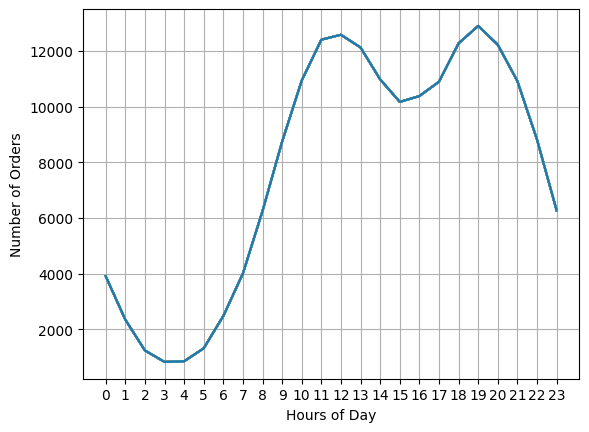

In [11]:
hours = [hour for hour, df in All_Data.groupby('Hour')]  # Get unique hours from the DataFrame

plt.plot(hours, All_Data.groupby(['Hour']).count())  # Plot the count of orders by hour

plt.xticks(hours)  # Set the x-axis tick labels to be the unique hours

plt.xlabel('Hours of Day')  # Set the label for the x-axis
plt.ylabel('Number of Orders')  # Set the label for the y-axis

plt.grid()  # Add gridlines to the plot

plt.show()  # Display the plot


         

## What product are most sold together ?

#### Sorting and creating all duplicate id orders to filter which product was purchased together

In [12]:
df = All_Data[All_Data['Order ID'].duplicated(keep=False)]  # Select rows with duplicated Order ID
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))  # Concatenate products per Order ID
df = df[['Order ID', 'Grouped']].drop_duplicates()  # Select relevant columns and drop duplicates

C:\Users\louza\AppData\Local\Temp\ipykernel_12824\460002634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))  # Concatenate products per Order ID


#### Filter the data and display the products that were purchased together

In [16]:
output_dir = r'.\Output\Purchased_together.xlsx'  # Output directory path
dt = 100  # Number of rows to check

count = Counter()  # Counter object for counting combinations
for row in df['Grouped']:
    row_list = row.split(',')  # Split values by commas
    count.update(Counter(combinations(row_list, 2)))  # Update counter with combinations

data = []  # List to store combination and count data
for key, value in count.most_common(dt):
    data.append([key, value])  # Append combination and count to data list

df_result = pd.DataFrame(data, columns=['Combination', 'Count'])  # Create DataFrame
df_result.to_excel(output_dir, index=False)  # Save DataFrame to Excel file

print('All data has been saved as Output(100): Purchased_together.xlsx')  
df_result.head(10)


All data has been saved as Output(100): Purchased_together.xlsx


,Combination,Count
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",360
6,"(Google Phone, Bose SoundSport Headphones)",220
7,"(USB-C Charging Cable, Wired Headphones)",160
8,"(Vareebadd Phone, Wired Headphones)",143
9,"(Lightning Charging Cable, Wired Headphones)",92


## Most sold product graph:

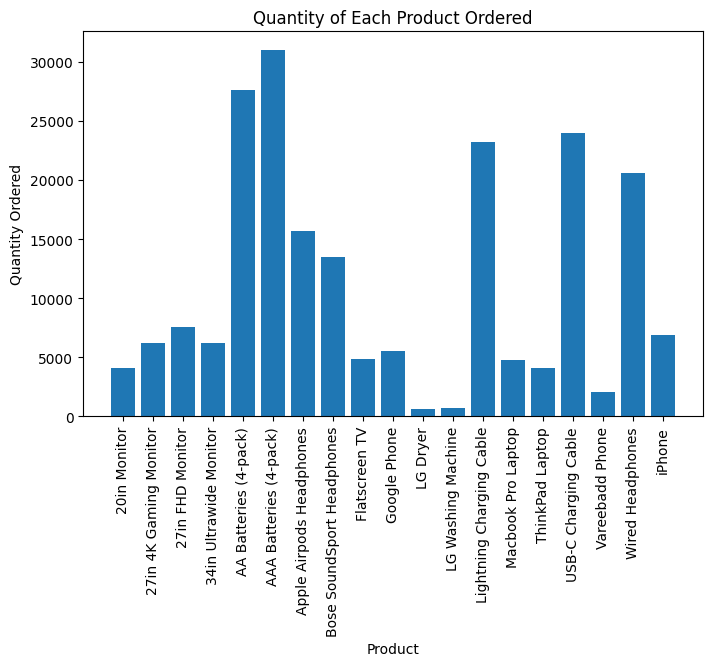

Best-seller product:  AAA Batteries (4-pack)


In [14]:
product_group = All_Data.groupby('Product')  # Group the DataFrame by 'Product'
quantity_ordered = product_group['Quantity Ordered'].sum()  # Calculate the sum of 'Quantity Ordered' for each product
result = quantity_ordered.idxmax()  # Get the product with the highest quantity ordered

# Create a bar chart
plt.figure(figsize=(8, 5))  # Set the figure size
plt.bar(quantity_ordered.index, quantity_ordered.values)  # Plot the bars
plt.xlabel('Product')  # Set the x-axis label
plt.ylabel('Quantity Ordered')  # Set the y-axis label
plt.title('Quantity of Each Product Ordered')  # Set the title
plt.xticks(rotation=90)  # Rotate x-axis tick labels for better visibility
plt.show()  # Display the chart

print('Best-seller product: ',result)  # Print the product with the highest quantity ordered